In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Training Series.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,...,training_session,number_of_participant,training_field,training_name,cross_selling,upselling,sales_ID,sales_name,sales_email,sales_phone
0,0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,...,17,19,Training Series,Comprehensive Train The Trainers,Train The Trainer For Outbound (Indoor-outdoor...,Comprehensive Train The Trainers,S0001,Tasnim Fujiati,saragihalika@hotmail.com,+62 (914) 912-3957
1,1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,...,17,18,Training Series,Comprehensive Train The Trainers,Menyusun Kurikulum Pelatihan Berbasis Kompetensi,Comprehensive Train The Trainers,S0002,"Jelita Irawan, S.Ked",agnessaputra@yahoo.com,(0711) 678 9718
2,2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,...,17,19,Training Series,Comprehensive Train The Trainers,Train The Trainer For Outbound (Indoor-outdoor...,Comprehensive Train The Trainers,S0003,Dr. Yulia Siregar,najmudinerik@hotmail.com,+62 (68) 864-9445
3,3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,...,17,19,Training Series,Comprehensive Train The Trainers,Train The Trainer For Outbound (Indoor-outdoor...,Comprehensive Train The Trainers,S0004,Indah Sihombing,vmarpaung@hotmail.com,+62 (087) 511-0540
4,4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,...,17,20,Training Series,Comprehensive Train The Trainers,Train The Trainer For Outbound (Indoor-outdoor...,Comprehensive Train The Trainers,S0005,"Okta Purnawati, S.Farm",wasitacandra@hotmail.com,+62 (027) 997 6053


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0.1                                 5000 non-null   int64  
 1   Unnamed: 0                                   5000 non-null   int64  
 2   company_ID                                   5000 non-null   object 
 3   company_name                                 5000 non-null   object 
 4   company_pic                                  5000 non-null   object 
 5   company_address                              5000 non-null   object 
 6   company_phone                                5000 non-null   object 
 7   company_email                                5000 non-null   object 
 8   company_field                                5000 non-null   object 
 9   transaction_date                             5000 non-null   object 
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop("cross_selling", axis=1, inplace=True)

In [5]:
# Preprocessing untuk fitur kategori
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

numeric_features = ["level_training_process", "total_payment",
                    "training_price", "interest_in_discount_program",
                    "training_session", "discount_training"]

categorical_features = ["group", "communication_quality", "training_name"]

drop_features = ["Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email", "company_field",
                 "transaction_date", "purchasing_time_patterns", "rating_training", "complaints",
                 "training_ID", "training_field", "possibility_of_purchasing_the_same_training",
                 "trainer_name", "communication_channel", "tren_mode_factor",  "sales_ID", "sales_name", "sales_email", "sales_phone"]

# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features)
    ],
    remainder="passthrough"
    )

In [6]:
X = df.drop("upselling", axis=1)
y = df["upselling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pkl = joblib.load(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\modelling\classification\upselling\model_save\model7.pkl")
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("models", pkl)
])
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 470
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] Start training from score -1.615708
[LightGBM] [Info] Start training from score -1.610689
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.601966
[LightGBM] [Info] Start training from score -1.609438


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['level_training_process',
                                                   'total_payment',
                                                   'training_price',
                                                   'interest_in_discount_program',
                                                   'training_session',
                                                   'discount_training']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(stra...
                                                   'transaction_date',
                                                   'purchasing_time_patterns',
                                                   'rating_training',
                                                   'complaints', 'training_ID',
                                                   'training_field',
                                                   'possibility_of_purchasing_the_same_training',
                                                   'trainer_name',
                                                   'communication_channel',
                                                   'tren_mode_factor',
                                                   'sales_ID', 'sales_name',
                                                   'sales_email',
                                                   'sales_phone'])])),
                ('models',
                 LGBMClassifier(learning_rate=0.01, max_depth=5,
                                n_estimators=50, num_leaves=15))])

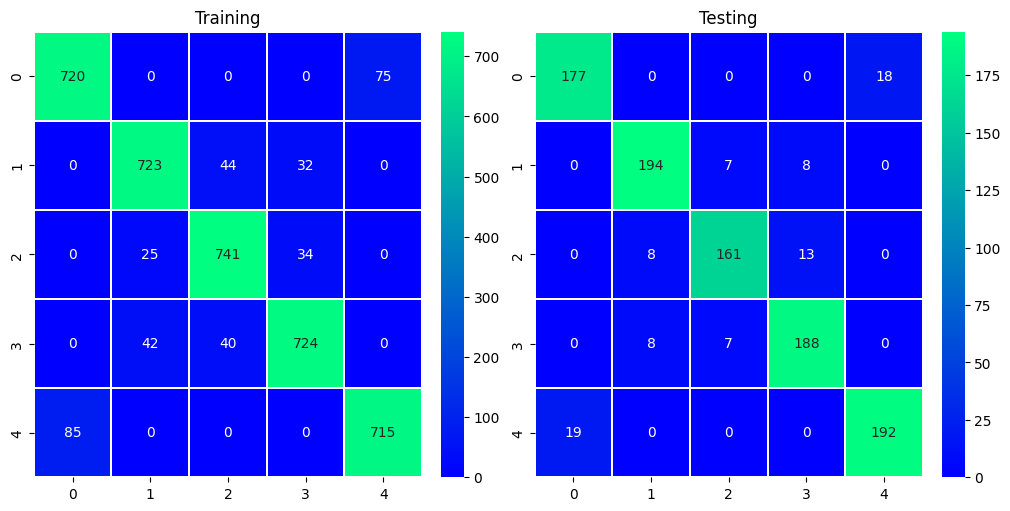

In [7]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [8]:
print(classification_report(y_test, y_pred))

                                                                                 precision    recall  f1-score   support

                                               Comprehensive Train The Trainers       0.90      0.91      0.91       195
                          Drill for Trainers: Mastering 10 Core Trainer's Tools       0.92      0.93      0.93       209
How to Conduct TNA, Creating Training Material & Measuring Training Effectivity       0.92      0.88      0.90       182
                               Menyusun Kurikulum Pelatihan Berbasis Kompetensi       0.90      0.93      0.91       203
                       Train The Trainer For Outbound (Indoor-outdoor) Activity       0.91      0.91      0.91       211

                                                                       accuracy                           0.91      1000
                                                                      macro avg       0.91      0.91      0.91      1000
                              

In [9]:
a = model.predict_proba(X_test.iloc[:1, :])
b = ["Comprehensive Train The Trainers", "Drill for Trainers: Mastering 10 Core Trainer's Tools", 
     "How to Conduct TNA, Creating Training Material & Measuring Training Effectivity", "Menyusun Kurikulum Pelatihan Berbasis Kompetensi",
     "Train The Trainer For Outbound (Indoor-outdoor) Activity",
     ]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

Comprehensive Train The Trainers 49.19%
Drill for Trainers: Mastering 10 Core Trainer's Tools 11.18%
How to Conduct TNA, Creating Training Material & Measuring Training Effectivity 11.19%
Menyusun Kurikulum Pelatihan Berbasis Kompetensi 11.27%
Train The Trainer For Outbound (Indoor-outdoor) Activity 17.18%


In [10]:
model.predict(X_test.iloc[:1, :])

array(['Comprehensive Train The Trainers'], dtype=object)

In [11]:
y_test.iloc[0]

'Comprehensive Train The Trainers'

In [12]:
X_test.iloc[:1, :]

,Unnamed: 0.1,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,...,training_price,discount_training,training_session,number_of_participant,training_field,training_name,sales_ID,sales_name,sales_email,sales_phone
1501,1501,1501,P1502,UD Napitupulu (Persero) Tbk,Kadir Sitompul,"Gg. Otto Iskandardinata No. 14\nSalatiga, DKI ...",+62 (0993) 413-3583,purwantitugiman@example.org,Aktivitas Kesehatan Manusia Dan Aktivitas Sosial,2024-02-10,...,6500000.0,30,14,12,Training Series,Train The Trainer For Outbound (Indoor-outdoor...,S0158,"Cut Tira Suryatmi, S.Gz",csiregar@yahoo.com,+62 (52) 302-7504


In [13]:
joblib.dump(model, "./pipeline_save/pipeline7.joblib")

['./pipeline_save/pipeline7.joblib']